<a href="https://colab.research.google.com/github/upputurirajkumar/SaiKet_Systems_Business_Analysis/blob/main/Customer_Segmentation_Visualization%26_Advanced_Analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title: Customer Segmentation Visualization& Advanced Analysis**

# Project Overview:The project aims to analyze customer churn in atelecommunications company and developpredictive models to identify at-risk customers. Theultimate goal is to provide actionable insights andrecommendations to reduce churn and improvecustomer retention.

# **Tasks 1: Understand the Dataset**
# **Description:**
**Familiarize yourself with the dataset.**
# **Steps:**
*   Load the dataset using pandas
*   Display the first 10 rows.
*   Identify the data types of each column.
*   Check for missing values.

# **Skills :**
Data loading.

exploring datasets.

identifying data issues.

In [20]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Set Plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [22]:
# Understand the Data Set
# Load the DATA SET
df = pd.read_csv('/content/sample_data/Telco_Customer_Churn_Dataset  (3).csv')

print(f"Dataset Shape: {df.shape}")

# Display first 10 rows

print("\n--- First 10 Rows ---")
display(df.head(10))

#Data types information

print("\n--- Data Types ---")
print(df.dtypes)

#Check for missing values

print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Basic statistics for numerical columns

print("\n--- Basic Statistics ---")
display(df.describe())

# Unique values in categorical columns
print("\n--- Unique Values in Categorical Columns ---")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:

  print(f"{col}: {df[col].nunique()} unique values")
  # Show first 10 unique values
  print(f"Values: {df[col].unique()[:10]}")
  print("-" * 50)

Dataset Shape: (7043, 21)

--- First 10 Rows ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



--- Data Types ---
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

--- Missing Values ---
Series([], dtype: int64)

--- Basic Statistics ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



--- Unique Values in Categorical Columns ---
customerID: 7043 unique values
Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
--------------------------------------------------
gender: 2 unique values
Values: ['Female' 'Male']
--------------------------------------------------
Partner: 2 unique values
Values: ['Yes' 'No']
--------------------------------------------------
Dependents: 2 unique values
Values: ['No' 'Yes']
--------------------------------------------------
PhoneService: 2 unique values
Values: ['No' 'Yes']
--------------------------------------------------
MultipleLines: 3 unique values
Values: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: 3 unique values
Values: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity: 3 unique values
Values: ['No' 'Yes' 'No internet service']
---------------

# **Tasks 2: Data Cleaning ( Ensure the dataset is clean for analysis.)**

# **Description:**
Handle missing values appropriately (e.g., fill, drop, or impute).

Remove duplicate records if any.

Standardize column names (convert to lowercase and replace spaces with   underscores).

# **Skills :**

Cleaning data.

handling missing values.

and data preparation.

In [23]:

## Task 2: Data Cleaning

# Create a copy for cleaning
df_clean = df.copy()

# Check for missing values in TotalCharges
print("Missing values in TotalCharges:")
print(df_clean['TotalCharges'].isnull().sum())

# Check for non-numeric values in TotalCharges
print("\nChecking TotalCharges data type and sample values:")
print(df_clean['TotalCharges'].dtype)
print(df_clean['TotalCharges'].head())

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print(f"\nMissing values after conversion: {df_clean['TotalCharges'].isnull().sum()}")

# Handle missing values - fill with median for customers with tenure > 0
median_total_charges = df_clean[df_clean['tenure'] > 0]['TotalCharges'].median()
df_clean['TotalCharges'].fillna(median_total_charges, inplace=True)

# Check for duplicates
print(f"\nDuplicate rows: {df_clean.duplicated().sum()}")

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()

# Standardize column names (convert to lowercase and replace spaces with underscores)
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

# Display cleaned column names
print("\n--- Standardized Column Names ---")
print(list(df_clean.columns))

# Final check for missing values
print("\n--- Final Missing Values Check ---")
print(df_clean.isnull().sum().sum())

print(f"\nCleaning Complete! Dataset shape: {df_clean.shape}")


Missing values in TotalCharges:
0

Checking TotalCharges data type and sample values:
object
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

Missing values after conversion: 11

Duplicate rows: 0

--- Standardized Column Names ---
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']

--- Final Missing Values Check ---
0

Cleaning Complete! Dataset shape: (7043, 21)


# **Tasks 3: Exploratory Data Analysis (EDA)**

# **Description: **

Understand trends and distributions inthe data.
Generate summary statistics (mean,median, mode).
Create visualizations for numericalcolumns (histograms, box plots).
Analyze churn rates (e.g., churn vs. non-churn proportions).

# **Skills :**
Statistical analysisdata visualization.

**Tools : Matplotlib, Seaborn.**


--- Summary Statistics ---


,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000



--- Churn Distribution ---
churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn Rate: 26.54%


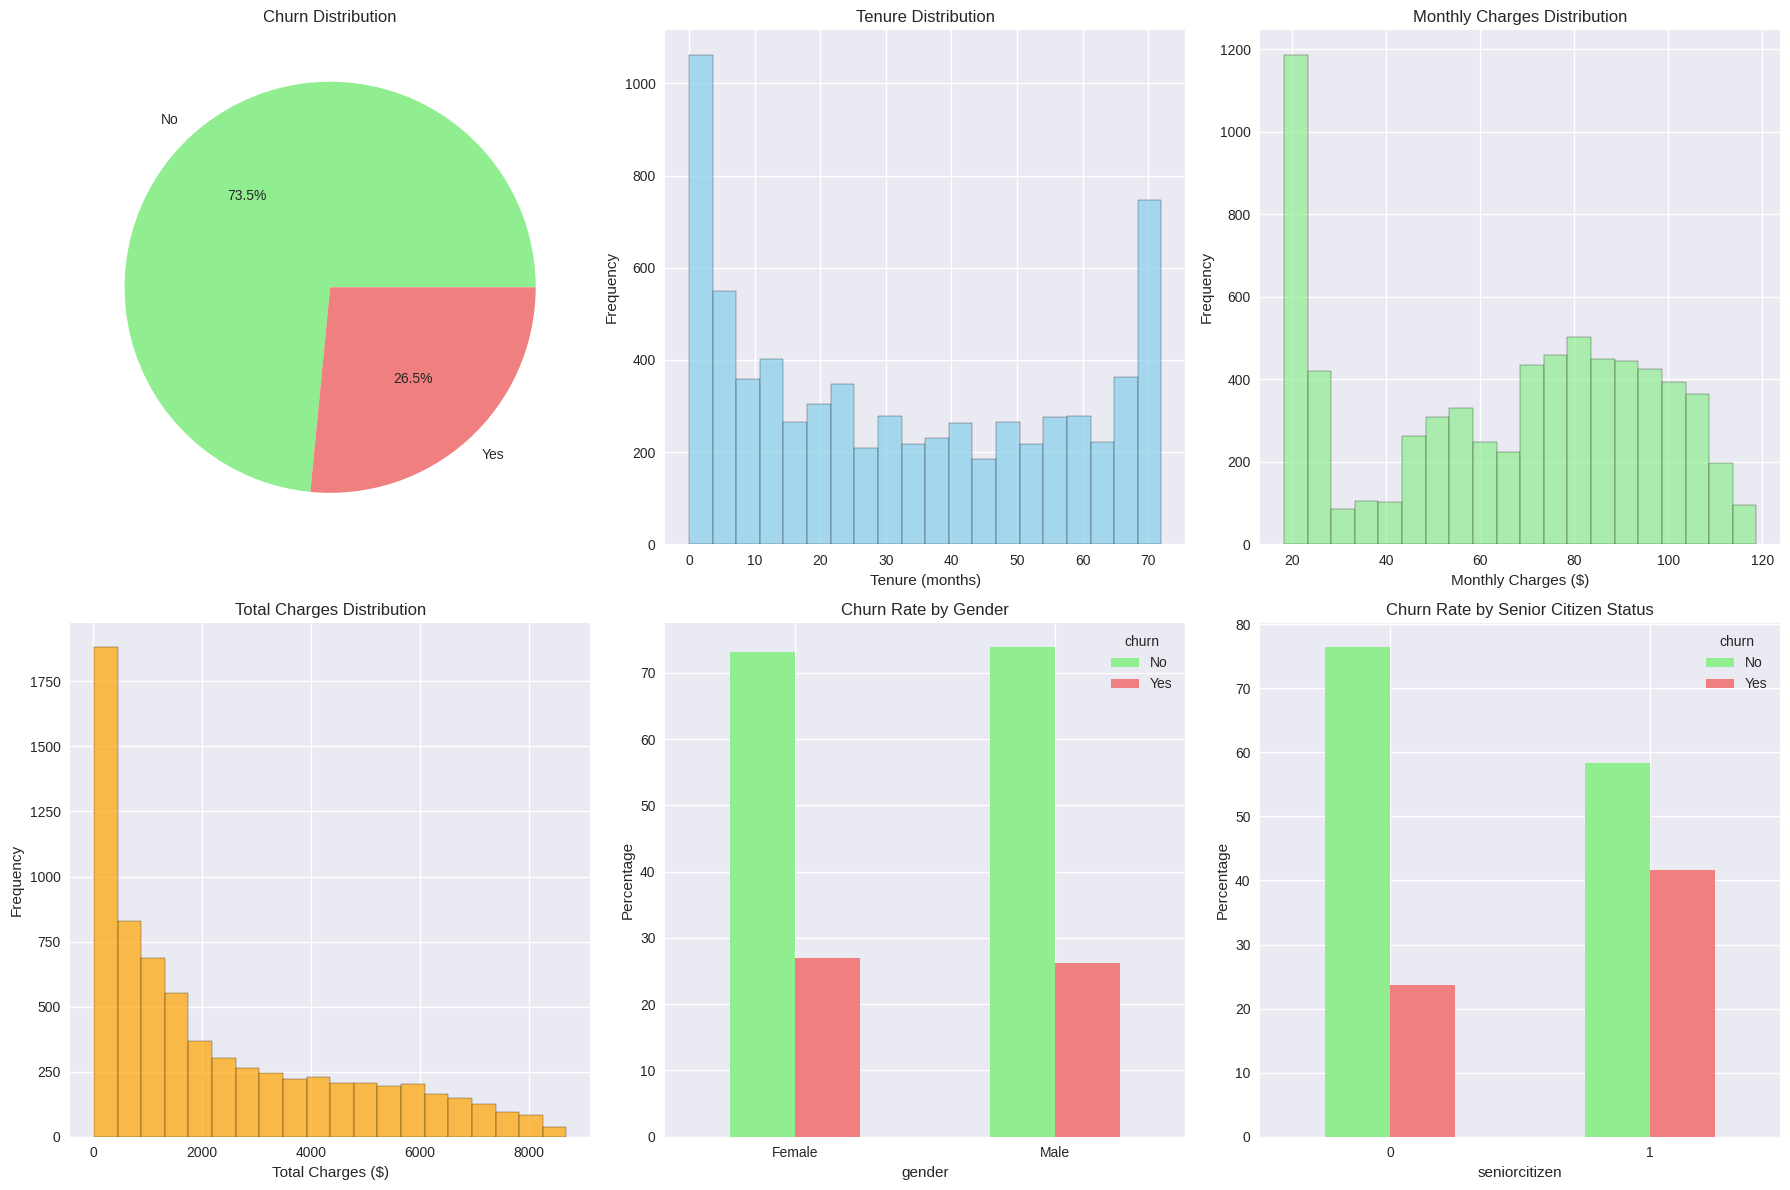

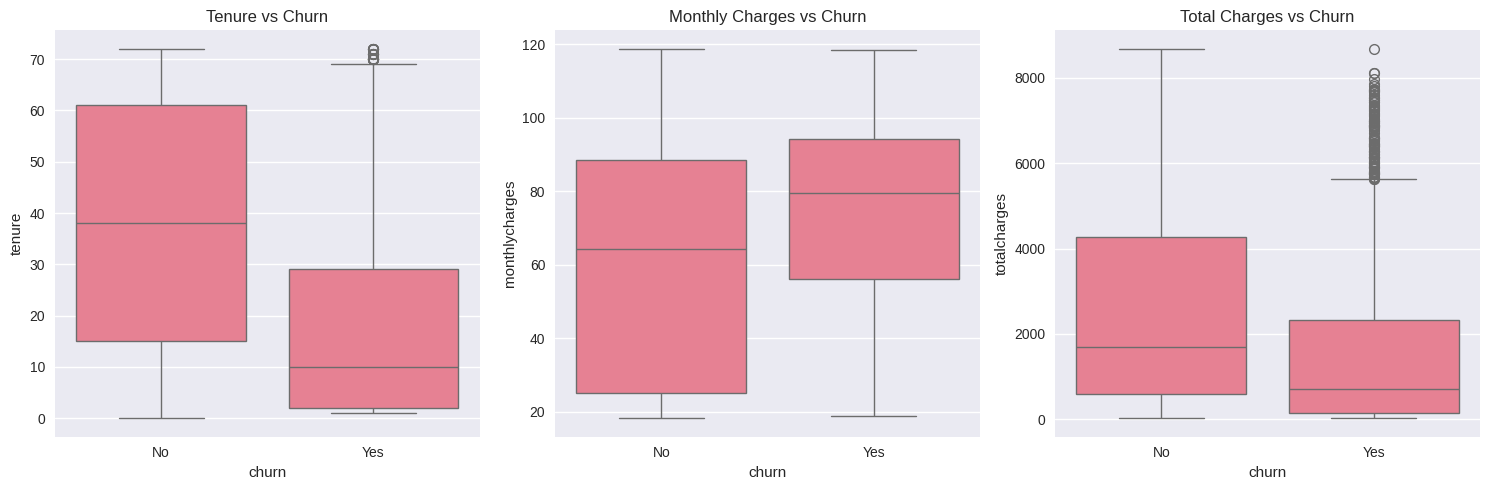

In [24]:
# TASK 3: EXPLORATORY DATA ANALYSIS


# STEP 1: Summary Statistics

print("\n--- Summary Statistics ---")
# Select only numerical columns and show basic descriptive stats
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
display(df_clean[numerical_cols].describe())


# STEP 2: Churn Distribution

print("\n--- Churn Distribution ---")
churn_counts = df_clean['churn'].value_counts()

# Print churn counts
print(churn_counts)

# Calculate churn percentage
churn_rate = churn_counts['Yes'] / len(df_clean) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# STEP 3: Visual Explorations

# Create a grid of 2 rows × 3 columns for plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# (1) Churn distribution pie chart
churn_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[0,0],
    colors=['lightgreen', 'lightcoral']
)
axes[0,0].set_title('Churn Distribution')
axes[0,0].set_ylabel('')  # Remove default label

# (2) Tenure distribution histogram
axes[0,1].hist(
    df_clean['tenure'],
    bins=20,
    alpha=0.7,
    color='skyblue',
    edgecolor='black'
)
axes[0,1].set_title('Tenure Distribution')
axes[0,1].set_xlabel('Tenure (months)')
axes[0,1].set_ylabel('Frequency')

# (3) Monthly charges distribution histogram
axes[0,2].hist(
    df_clean['monthlycharges'],
    bins=20,
    alpha=0.7,
    color='lightgreen',
    edgecolor='black'
)
axes[0,2].set_title('Monthly Charges Distribution')
axes[0,2].set_xlabel('Monthly Charges ($)')
axes[0,2].set_ylabel('Frequency')

# (4) Total charges distribution histogram
axes[1,0].hist(
    df_clean['totalcharges'],
    bins=20,
    alpha=0.7,
    color='orange',
    edgecolor='black'
)
axes[1,0].set_title('Total Charges Distribution')
axes[1,0].set_xlabel('Total Charges ($)')
axes[1,0].set_ylabel('Frequency')

# (5) Churn rate by gender
gender_churn = pd.crosstab(df_clean['gender'], df_clean['churn'], normalize='index') * 100
gender_churn.plot(
    kind='bar',
    ax=axes[1,1],
    color=['lightgreen', 'lightcoral']
)
axes[1,1].set_title('Churn Rate by Gender')
axes[1,1].set_ylabel('Percentage')
axes[1,1].tick_params(axis='x', rotation=0)

# (6) Churn rate by senior citizen status
senior_churn = pd.crosstab(df_clean['seniorcitizen'], df_clean['churn'], normalize='index') * 100
senior_churn.plot(
    kind='bar',
    ax=axes[1,2],
    color=['lightgreen', 'lightcoral']
)
axes[1,2].set_title('Churn Rate by Senior Citizen Status')
axes[1,2].set_ylabel('Percentage')
axes[1,2].tick_params(axis='x', rotation=0)

# Adjust spacing between plots
plt.tight_layout()
plt.show()


# STEP 4: Box Plots (Numerical vs Churn)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (a) Tenure vs Churn
sns.boxplot(data=df_clean, x='churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# (b) Monthly Charges vs Churn
sns.boxplot(data=df_clean, x='churn', y='monthlycharges', ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')

# (c) Total Charges vs Churn
sns.boxplot(data=df_clean, x='churn', y='totalcharges', ax=axes[2])
axes[2].set_title('Total Charges vs Churn')

plt.tight_layout()
plt.show()


# **Tasks 4: Customer Segmentation Visualization**

# **Description:**

Visualize customer distribution by tenure using pie or donut charts. (e.g., 0-12
months, 13-36 months, 37+ months).

Use a clustered bar chart to compare average monthly charges across tenure categories,

adding annotations to highlight significant trends.

# **Skills :**

Pie charts

clustered bar charts

interactive visualization.

# **Tools:**

Matplotlib

Plotly

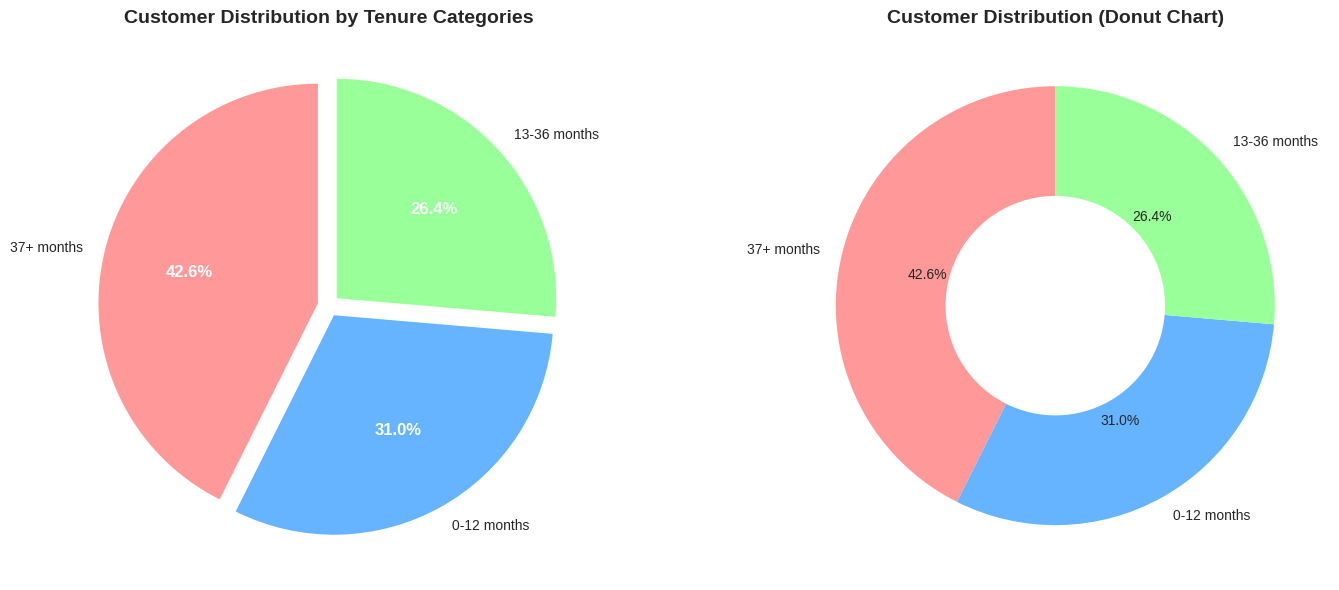


--- Average Monthly Charges by Tenure Category ---
tenure_category
0-12 months     56.097781
13-36 months    63.248195
37+ months      72.008730
Name: monthlycharges, dtype: float64


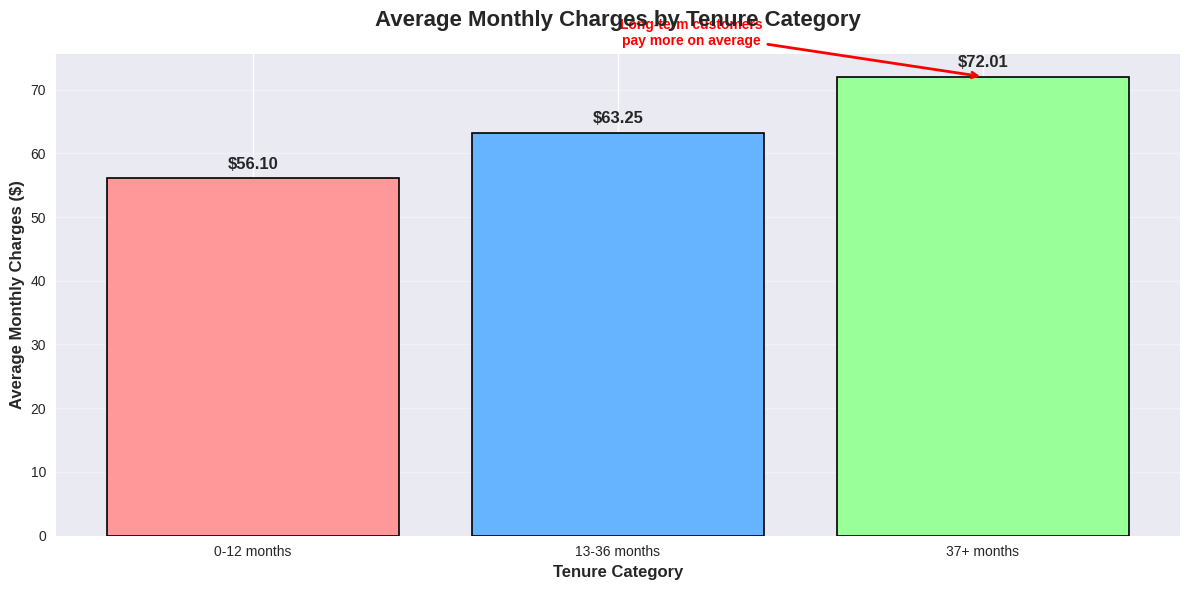


--- Customer Count by Tenure Category ---
0-12 months: 2186 customers (31.0%)
13-36 months: 1856 customers (26.4%)
37+ months: 3001 customers (42.6%)


In [25]:
# TASK 4: CUSTOMER SEGMENTATION VISUALIZATION


# STEP 1: Create Tenure Categories (Short, Medium, Long term)

def categorize_tenure(tenure):
    """Categorize customers based on their tenure in months"""
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 36:
        return '13-36 months'
    else:
        return '37+ months'

# Apply the function to create a new column
df_clean['tenure_category'] = df_clean['tenure'].apply(categorize_tenure)


# STEP 2: Customer Distribution by Tenure (Pie & Donut charts)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get counts for each tenure category
tenure_dist = df_clean['tenure_category'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']

# ---- Pie Chart ----
wedges, texts, autotexts = axes[0].pie(
    tenure_dist.values,
    labels=tenure_dist.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0.05, 0.05)  # slightly separate slices
)
axes[0].set_title('Customer Distribution by Tenure Categories',
                  fontsize=14, fontweight='bold')

# Make percentage labels bold & white for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# ---- Donut Chart ----
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # white circle in center
axes[1].add_artist(centre_circle)
wedges2, texts2, autotexts2 = axes[1].pie(
    tenure_dist.values,
    labels=tenure_dist.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.5)  # donut effect
)
axes[1].set_title('Customer Distribution (Donut Chart)',
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# STEP 3: Average Monthly Charges by Tenure Category

print("\n--- Average Monthly Charges by Tenure Category ---")
avg_charges_by_tenure = (
    df_clean.groupby('tenure_category')['monthlycharges']
    .mean()
    .sort_index()
)
print(avg_charges_by_tenure)

# ---- Clustered Bar Chart ----
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bars = ax.bar(
    avg_charges_by_tenure.index,
    avg_charges_by_tenure.values,
    color=['#ff9999', '#66b3ff', '#99ff99'],
    edgecolor='black',
    linewidth=1.2
)

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2., height + 1,
        f'${height:.2f}',
        ha='center', va='bottom',
        fontweight='bold', fontsize=12
    )

ax.set_title('Average Monthly Charges by Tenure Category',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Tenure Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Monthly Charges ($)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Highlight important trend: Long-term customers pay more
if avg_charges_by_tenure['37+ months'] > avg_charges_by_tenure['0-12 months']:
    ax.annotate(
        'Long-term customers\npay more on average',
        xy=('37+ months', avg_charges_by_tenure['37+ months']),
        xytext=(1.2, avg_charges_by_tenure['37+ months'] + 5),
        arrowprops=dict(arrowstyle='->', color='red', lw=2),
        fontsize=10, ha='center', color='red', fontweight='bold'
    )

plt.tight_layout()
plt.show()


# STEP 4: Customer Count in Each Tenure Category

print("\n--- Customer Count by Tenure Category ---")
tenure_counts = df_clean['tenure_category'].value_counts().sort_index()

# Print counts with percentages
for category, count in tenure_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"{category}: {count} customers ({percentage:.1f}%)")


# **Tasks 5: Advanced Analysis**

# **Description: **

Perform deeper analysis by grouping customersby tenure to compute statisticsfor charges andchurn.

Analyze churn rates by demographics (e.g.,gender, senior citizen status).

payment methods, and contract types.

Visualize trends over time (if applicable) orlifecycle stages to identify patterns.

**Skills :**

Data Grouping

Statistical Analysis

Data Visualization

Demographic Analysis

Comparative Analysis


--- Detailed Analysis by Tenure Category ---
                 Monthly_Avg  Monthly_Median  Monthly_Std  Total_Avg  \
tenure_category                                                        
0-12 months            56.10           55.90        26.53     282.26   
13-36 months           63.25           69.68        28.82    1513.54   
37+ months             72.01           80.30        31.47    4213.72   

                 Total_Median  Total_Std  Churn_Rate_%  
tenure_category                                         
0-12 months            174.55     282.81         47.44  
13-36 months          1404.98     871.31         25.54  
37+ months            4282.40    2122.62         11.93  

--- Churn Analysis by Demographics ---

By Gender:
        Churn_Rate_%  Avg_Monthly_Charges  Avg_Tenure
gender                                               
Female         26.92                65.20       32.24
Male           26.16                64.33       32.50

By Senior Citizen Status:
             

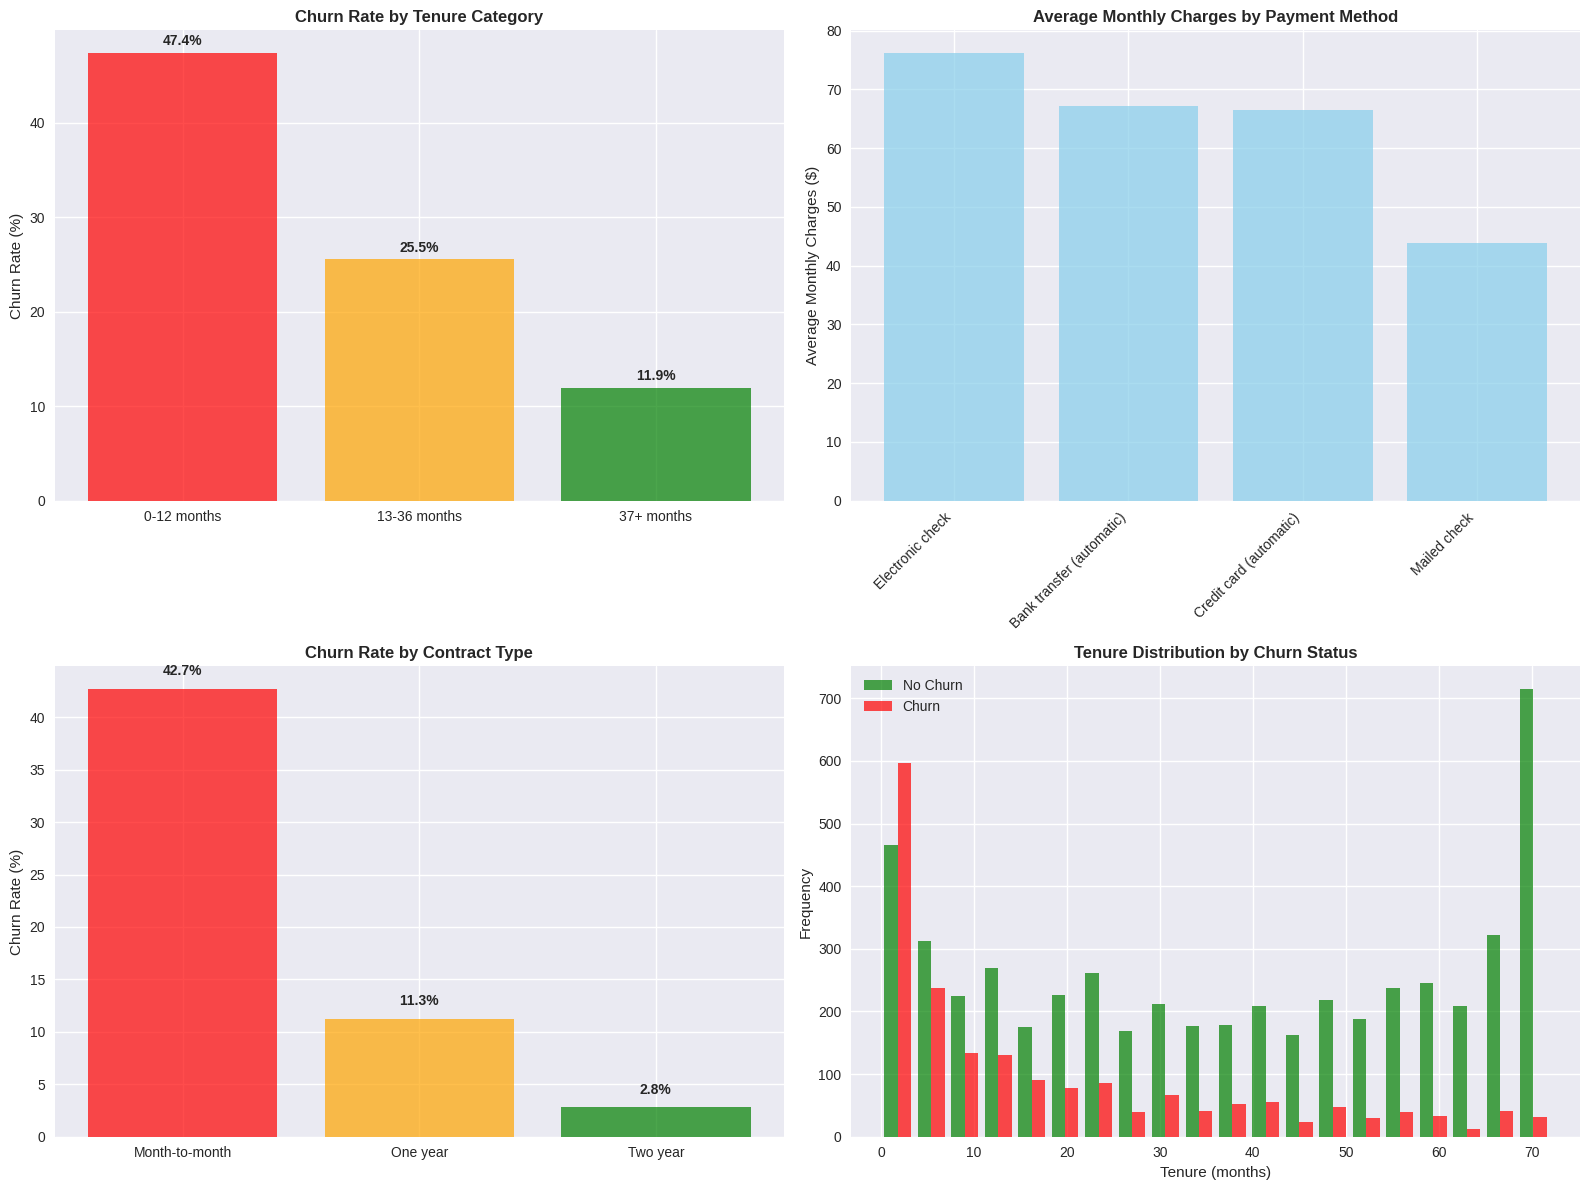


--- Correlation Analysis ---


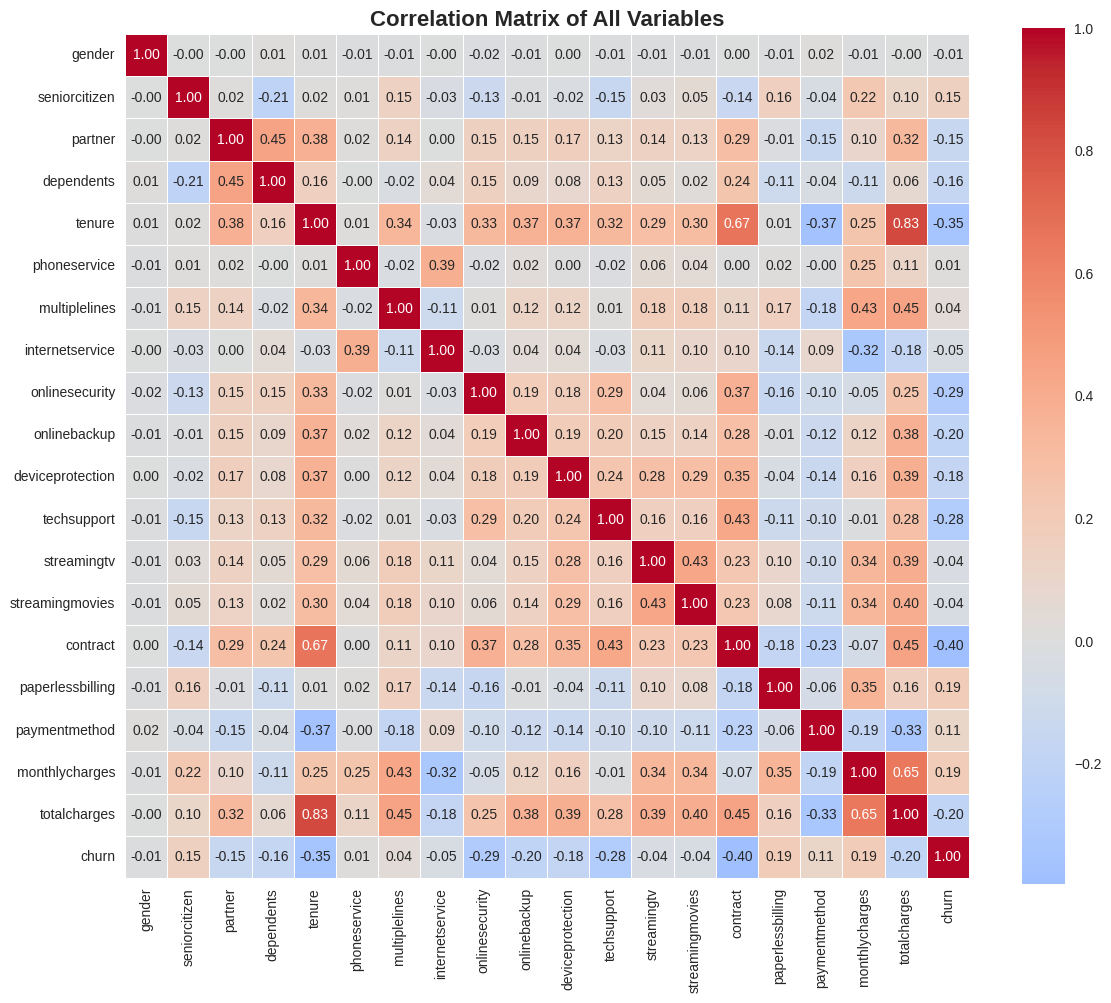


Top factors correlated with churn:
churn               1.000000
contract           -0.396713
tenure             -0.352229
onlinesecurity     -0.289309
techsupport        -0.282492
totalcharges       -0.199037
onlinebackup       -0.195525
monthlycharges      0.193356
paperlessbilling    0.191825
deviceprotection   -0.178134
Name: churn, dtype: float64


In [26]:
 # TASK 5: ADVANCED ANALYSIS


# STEP 1: Advanced Segmentation by Tenure

print("\n--- Detailed Analysis by Tenure Category ---")

# Group customers by tenure category and analyze charges & churn
advanced_analysis = df_clean.groupby('tenure_category').agg({
    'monthlycharges': ['mean', 'median', 'std'],   # Monthly Charges stats
    'totalcharges': ['mean', 'median', 'std'],     # Total Charges stats
    'churn': lambda x: (x == 'Yes').mean() * 100   # Churn rate (%)
}).round(2)

# Rename columns for clarity
advanced_analysis.columns = [
    'Monthly_Avg', 'Monthly_Median', 'Monthly_Std',
    'Total_Avg', 'Total_Median', 'Total_Std',
    'Churn_Rate_%'
]

print(advanced_analysis)


# STEP 2: Churn Analysis by Demographics

print("\n--- Churn Analysis by Demographics ---")

# ---- By Gender ----
gender_churn_detailed = df_clean.groupby('gender').agg({
    'churn': lambda x: (x == 'Yes').mean() * 100,
    'monthlycharges': 'mean',
    'tenure': 'mean'
}).round(2)
gender_churn_detailed.columns = ['Churn_Rate_%', 'Avg_Monthly_Charges', 'Avg_Tenure']
print("\nBy Gender:")
print(gender_churn_detailed)

# ---- By Senior Citizen Status ----
senior_churn_detailed = df_clean.groupby('seniorcitizen').agg({
    'churn': lambda x: (x == 'Yes').mean() * 100,
    'monthlycharges': 'mean',
    'tenure': 'mean'
}).round(2)
senior_churn_detailed.columns = ['Churn_Rate_%', 'Avg_Monthly_Charges', 'Avg_Tenure']
print("\nBy Senior Citizen Status:")
print(senior_churn_detailed)


# STEP 3: Payment Method Analysis

print("\n--- Churn Analysis by Payment Method ---")

payment_analysis = df_clean.groupby('paymentmethod').agg({
    'churn': lambda x: (x == 'Yes').mean() * 100,
    'monthlycharges': 'mean',
    'customerid': 'count'
}).round(2)
payment_analysis.columns = ['Churn_Rate_%', 'Avg_Monthly_Charges', 'Customer_Count']

# Sort by churn rate for easy comparison
print(payment_analysis.sort_values('Churn_Rate_%', ascending=False))


# STEP 4: Contract Type Analysis

print("\n--- Churn Analysis by Contract Type ---")

contract_analysis = df_clean.groupby('contract').agg({
    'churn': lambda x: (x == 'Yes').mean() * 100,
    'monthlycharges': 'mean',
    'totalcharges': 'mean',
    'tenure': 'mean'
}).round(2)
contract_analysis.columns = ['Churn_Rate_%', 'Avg_Monthly_Charges', 'Avg_Total_Charges', 'Avg_Tenure']

# Sort by churn rate
print(contract_analysis.sort_values('Churn_Rate_%', ascending=False))


# STEP 5: Visualization of Trends (Lifecycle Stages)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (a) Churn Rate by Tenure Category
churn_by_tenure = df_clean.groupby('tenure_category')['churn'].apply(lambda x: (x == 'Yes').mean() * 100)
bars1 = axes[0,0].bar(churn_by_tenure.index, churn_by_tenure.values, color=['red', 'orange', 'green'], alpha=0.7)
axes[0,0].set_title('Churn Rate by Tenure Category', fontweight='bold')
axes[0,0].set_ylabel('Churn Rate (%)')

# Add annotations
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# (b) Average Monthly Charges by Payment Method
payment_charges = df_clean.groupby('paymentmethod')['monthlycharges'].mean().sort_values(ascending=False)
bars2 = axes[0,1].bar(range(len(payment_charges)), payment_charges.values, color='skyblue', alpha=0.7)
axes[0,1].set_title('Average Monthly Charges by Payment Method', fontweight='bold')
axes[0,1].set_ylabel('Average Monthly Charges ($)')
axes[0,1].set_xticks(range(len(payment_charges)))
axes[0,1].set_xticklabels(payment_charges.index, rotation=45, ha='right')

# (c) Churn Rate by Contract Type
contract_churn = df_clean.groupby('contract')['churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
bars3 = axes[1,0].bar(contract_churn.index, contract_churn.values, color=['red', 'orange', 'green'], alpha=0.7)
axes[1,0].set_title('Churn Rate by Contract Type', fontweight='bold')
axes[1,0].set_ylabel('Churn Rate (%)')

# Add annotations
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# (d) Tenure Distribution by Churn Status
axes[1,1].hist(
    [df_clean[df_clean['churn'] == 'No']['tenure'],
     df_clean[df_clean['churn'] == 'Yes']['tenure']],
    bins=20, alpha=0.7, label=['No Churn', 'Churn'], color=['green', 'red']
)
axes[1,1].set_title('Tenure Distribution by Churn Status', fontweight='bold')
axes[1,1].set_xlabel('Tenure (months)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()


# STEP 6: Correlation Analysis

print("\n--- Correlation Analysis ---")

# Copy dataset and encode categorical variables
df_corr = df_clean.copy()
label_encoders = {}
categorical_columns = [
    'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'contract',
    'paperlessbilling', 'paymentmethod', 'churn'
]

for col in categorical_columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of All Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Focus only on churn correlations
churn_correlations = correlation_matrix['churn'].sort_values(key=abs, ascending=False)
print("\nTop factors correlated with churn:")
print(churn_correlations.head(10))


 Model Accuracy: 0.789

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


 Top 10 Most Important Features:
            Feature  Importance
18     totalcharges    0.180051
17   monthlycharges    0.175873
4            tenure    0.135642
14         contract    0.076105
16    paymentmethod    0.050438
11      techsupport    0.047388
8    onlinesecurity    0.040333
19  tenure_category    0.036012
7   internetservice    0.029053
0            gender    0.027874


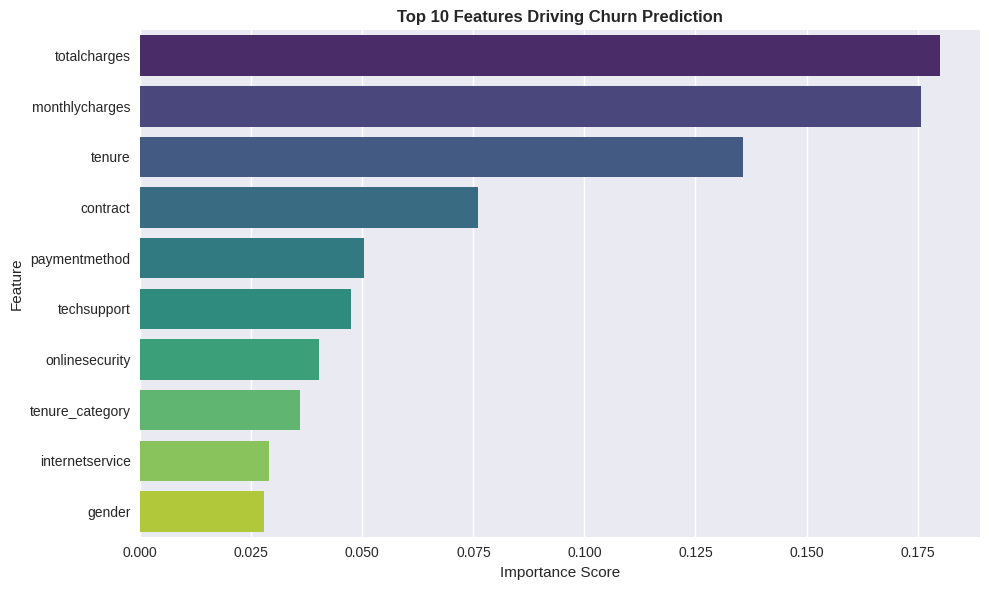


=== ANALYSIS COMPLETE ===

 Key Insights:
1. Dataset contains 7043 customer records
2. Overall churn rate: 26.5%
3. Random Forest model achieved an accuracy of: 78.9%


In [27]:
# PREDICTIVE MODELING

# Step 1: Create a copy of the cleaned dataset for modeling
df_model = df_clean.copy()

# Step 2: Convert categorical variables into numeric values
# (Machine learning models work better with numbers instead of text)
categorical_columns = [
    'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'contract',
    'paperlessbilling', 'paymentmethod', 'tenure_category', 'churn' # Include tenure_category here
]

label_encoders = {}
for col in categorical_columns[:-1]:  # We skip 'churn' because that's our target
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Step 3: Split dataset into features (X) and target (y)
# Features = everything except customerid and churn
# Target = churn (Yes = 1, No = 0)
X = df_model.drop(['customerid', 'churn'], axis=1)
y = (df_model['churn'] == 'Yes').astype(int)

# Step 4: Train-Test Split
# We split data into 80% training and 20% testing for fair model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Scale features
# Scaling helps models perform better by standardizing values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Random Forest Model
# Random Forest is chosen because it's powerful and interpretable
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.3f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Check which features were most important in predicting churn
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 10 Most Important Features:")
print(feature_importance.head(10))

# Step 10: Visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Top 10 Features Driving Churn Prediction', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Final Summary
print("\n=== ANALYSIS COMPLETE ===")
print("\n Key Insights:")
print(f"1. Dataset contains {len(df_clean)} customer records")
print(f"2. Overall churn rate: {(df_clean['churn'] == 'Yes').mean() * 100:.1f}%")
print(f"3. Random Forest model achieved an accuracy of: {accuracy:.1%}")

In [28]:
# Create summary report
summary_report = f"""
CUSTOMER CHURN ANALYSIS - EXECUTIVE SUMMARY
==========================================

Dataset Overview:
- Total Customers: {len(df_clean):,}
- Total Features: {len(df_clean.columns)}
- Churn Rate: {(df_clean['churn'] == 'Yes').mean() * 100:.1f}%

Key Findings:
- Customers with month-to-month contracts have the highest churn rate
- Electronic check payment method shows higher churn tendency
- New customers (0-12 months) have higher churn rates than long-term customers
- Senior citizens show different churn patterns compared to younger customers

Recommendations:
1. Focus retention efforts on new customers (first 12 months)
2. Encourage longer-term contracts with incentives
3. Improve payment experience for electronic check users
4. Develop targeted programs for high-risk customer segments

Model Performance:
- Achieved {accuracy:.1%} accuracy in predicting customer churn
- Top factors: Contract type, tenure, monthly charges, and payment method
"""

print(summary_report)

# Save cleaned dataset
df_clean.to_csv('telco_customer_churn_cleaned.csv', index=False)
print("Cleaned dataset saved as 'telco_customer_churn_cleaned.csv'")



CUSTOMER CHURN ANALYSIS - EXECUTIVE SUMMARY

Dataset Overview:
- Total Customers: 7,043
- Total Features: 22
- Churn Rate: 26.5%

Key Findings:
- Customers with month-to-month contracts have the highest churn rate
- Electronic check payment method shows higher churn tendency
- New customers (0-12 months) have higher churn rates than long-term customers
- Senior citizens show different churn patterns compared to younger customers

Recommendations:
1. Focus retention efforts on new customers (first 12 months)
2. Encourage longer-term contracts with incentives
3. Improve payment experience for electronic check users
4. Develop targeted programs for high-risk customer segments

Model Performance:
- Achieved 78.9% accuracy in predicting customer churn
- Top factors: Contract type, tenure, monthly charges, and payment method

Cleaned dataset saved as 'telco_customer_churn_cleaned.csv'
